### Univariate logistic regression 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from collections import Counter

# import sklearn as skl
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import precision_score, recall_score
# from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

# import pickle

In [25]:
df = pd.read_csv('aw_fb_data.csv')
df.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [33]:
# a test df of the following variables
df = df.loc[:, ['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'distance',
                            'entropy_heart', 'entropy_setps', 'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
                            'steps_times_distance',  'device', 'activity'] ]
df.head()                        

,age,gender,height,weight,steps,hear_rate,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,steps_times_distance,device,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,0.089692,apple watch,Lying
1,20,1,168.0,65.4,11.475325,78.453390,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,0.102088,apple watch,Lying
2,20,1,168.0,65.4,12.179221,78.540825,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,0.115287,apple watch,Lying
3,20,1,168.0,65.4,12.883117,78.628260,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,0.129286,apple watch,Lying
4,20,1,168.0,65.4,13.587013,78.715695,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.144088,apple watch,Lying


In [34]:
# convert numeric categorical variables into indicators
df1 = pd.get_dummies(df, columns=['gender','device','activity'])                              
df1.head()

,age,height,weight,steps,hear_rate,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,...,gender_0,gender_1,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting
0,20,168.0,65.4,10.771429,78.531302,0.008327,6.221612,6.116349,59.0,1.000000,...,False,True,True,False,True,False,False,False,False,False
1,20,168.0,65.4,11.475325,78.453390,0.008896,6.221612,6.116349,59.0,1.000000,...,False,True,True,False,True,False,False,False,False,False
2,20,168.0,65.4,12.179221,78.540825,0.009466,6.221612,6.116349,59.0,1.000000,...,False,True,True,False,True,False,False,False,False,False
3,20,168.0,65.4,12.883117,78.628260,0.010035,6.221612,6.116349,59.0,1.000000,...,False,True,True,False,True,False,False,False,False,False
4,20,168.0,65.4,13.587013,78.715695,0.010605,6.221612,6.116349,59.0,0.982816,...,False,True,True,False,True,False,False,False,False,False


In [35]:
df1.columns

Index(['age', 'height', 'weight', 'steps', 'hear_rate', 'distance',
       'entropy_heart', 'entropy_setps', 'resting_heart', 'corr_heart_steps',
       'norm_heart', 'intensity_karvonen', 'steps_times_distance', 'gender_0',
       'gender_1', 'device_apple watch', 'device_fitbit', 'activity_Lying',
       'activity_Running 3 METs', 'activity_Running 5 METs',
       'activity_Running 7 METs', 'activity_Self Pace walk',
       'activity_Sitting'],
      dtype='object')

### histogram for distribution

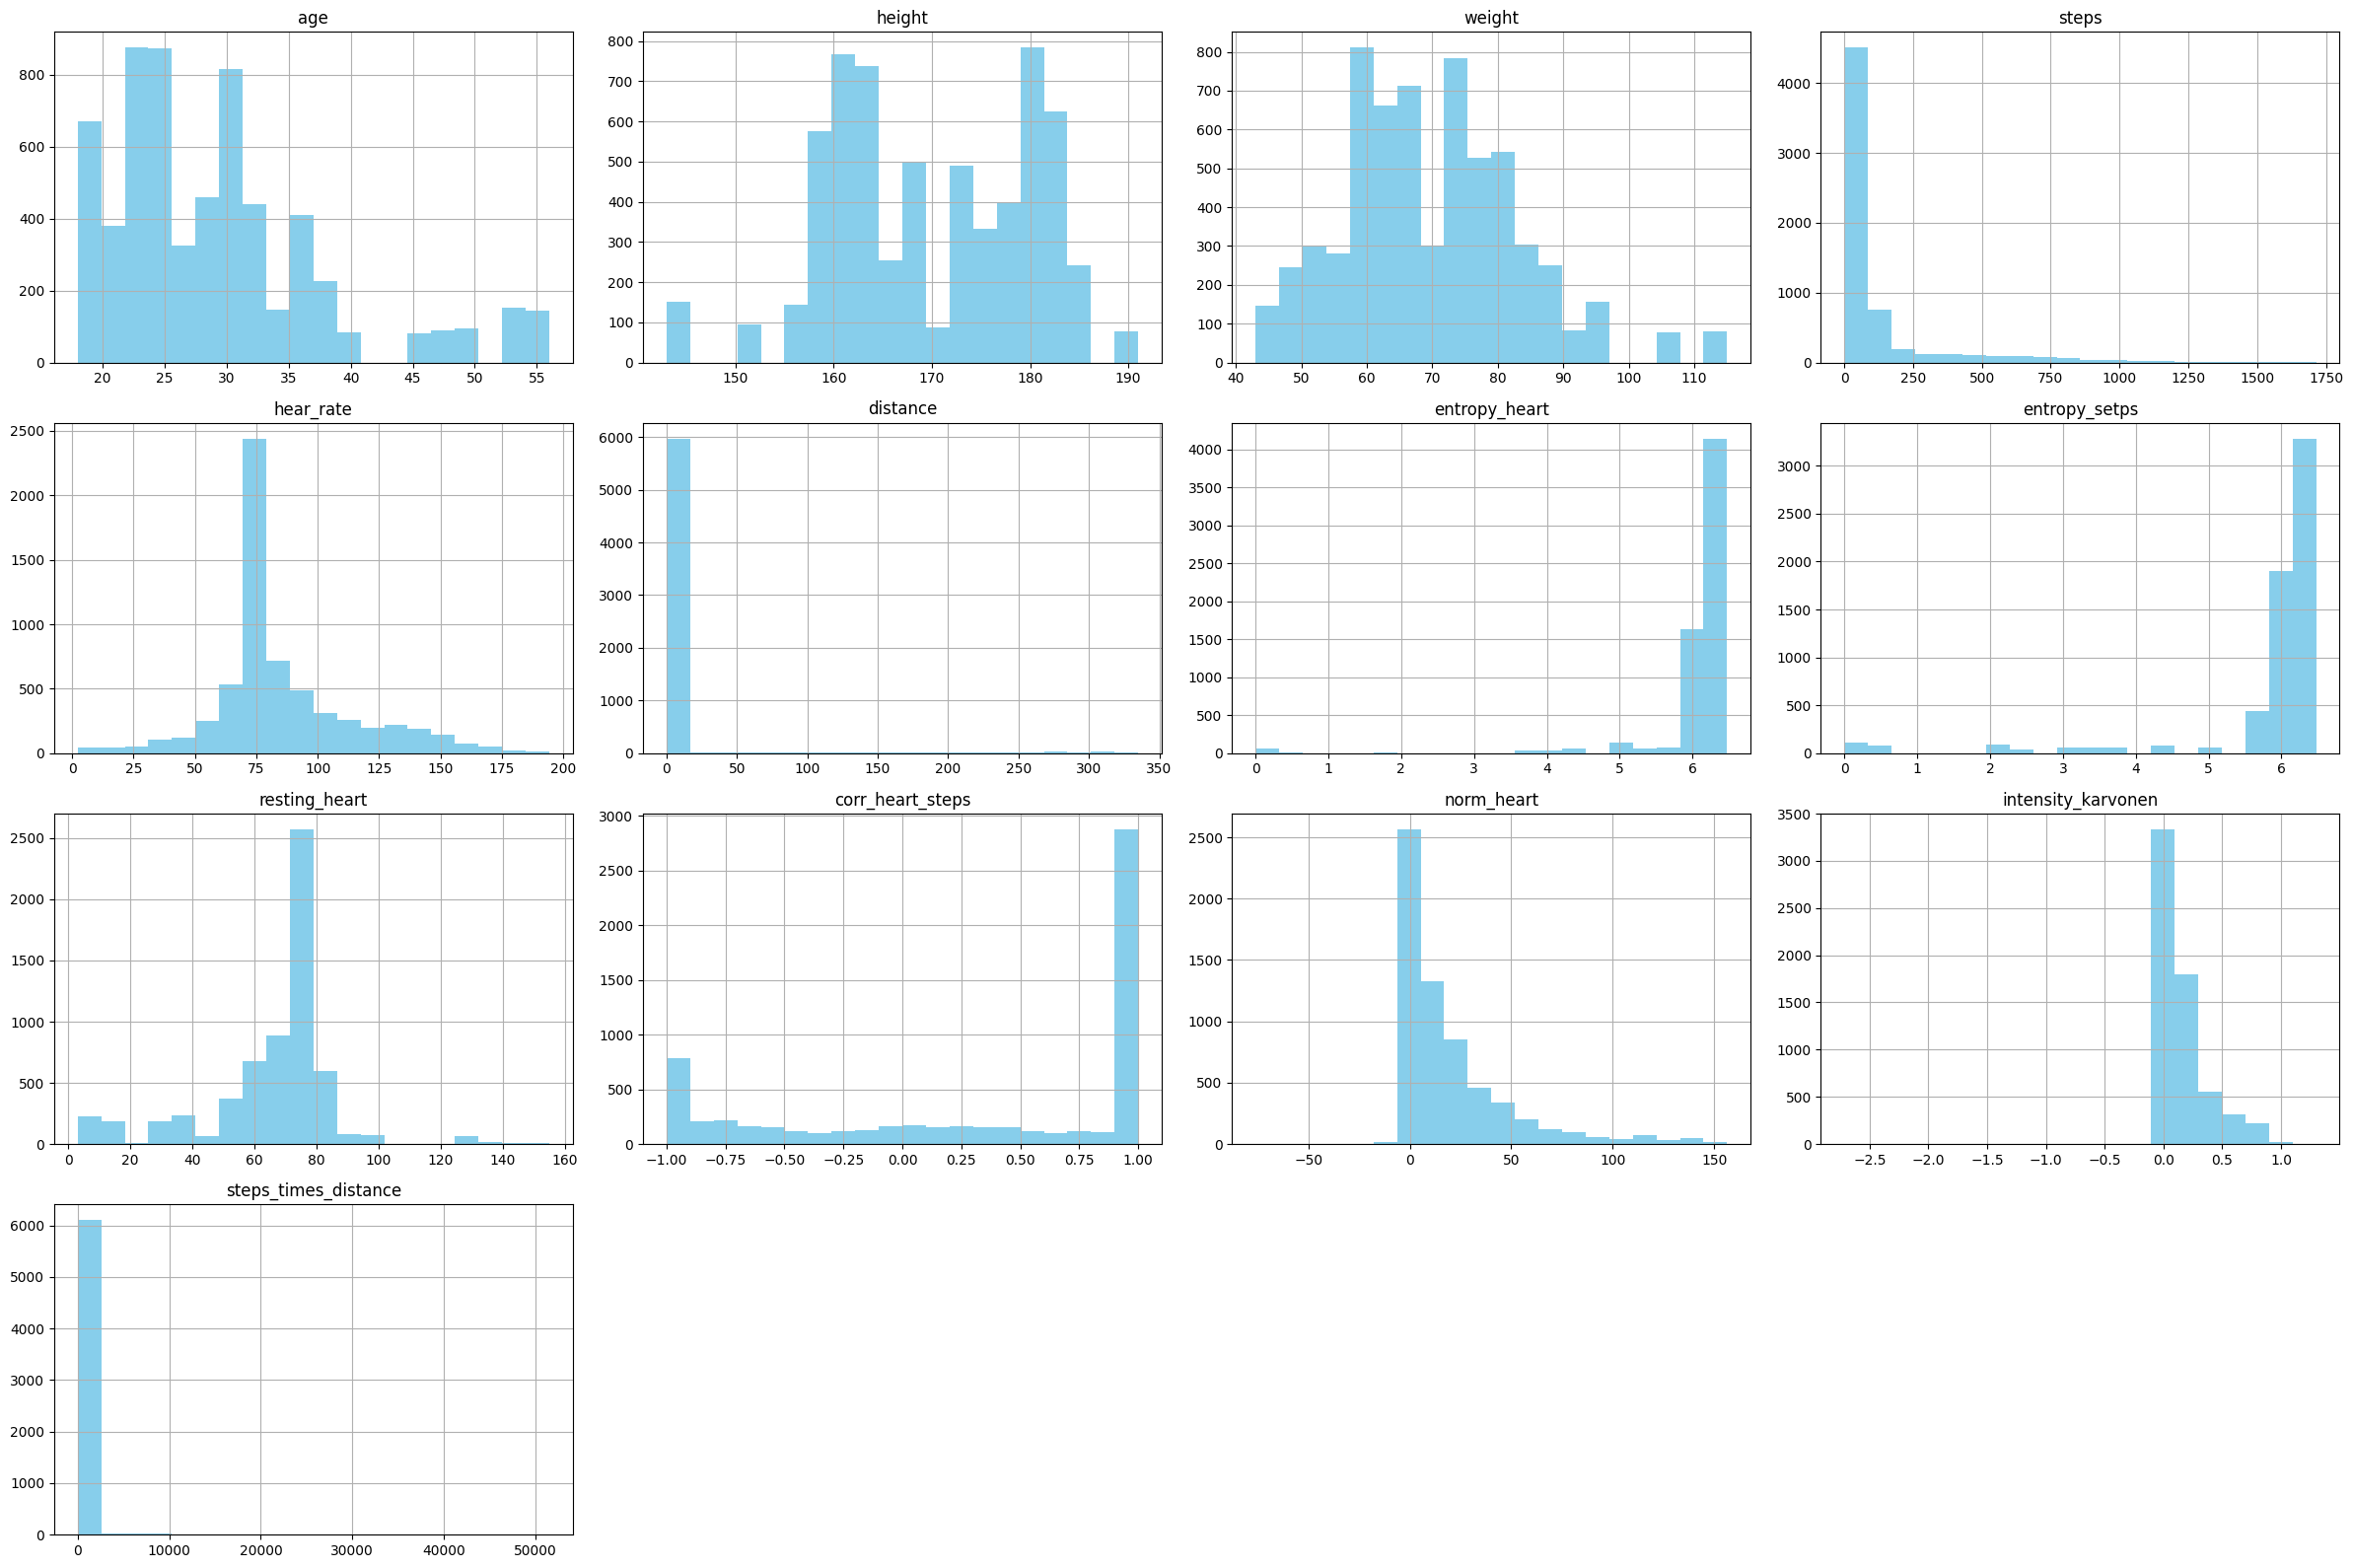

In [44]:
numeric_cols = ['age', 'height', 'weight', 'steps', 'hear_rate', 'distance', 'entropy_heart', 'entropy_setps', 'resting_heart', 
                'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'steps_times_distance' ]
df1[numeric_cols].hist(bins=20, figsize=(24, 16), color='skyblue')
plt.tight_layout()
plt.show()


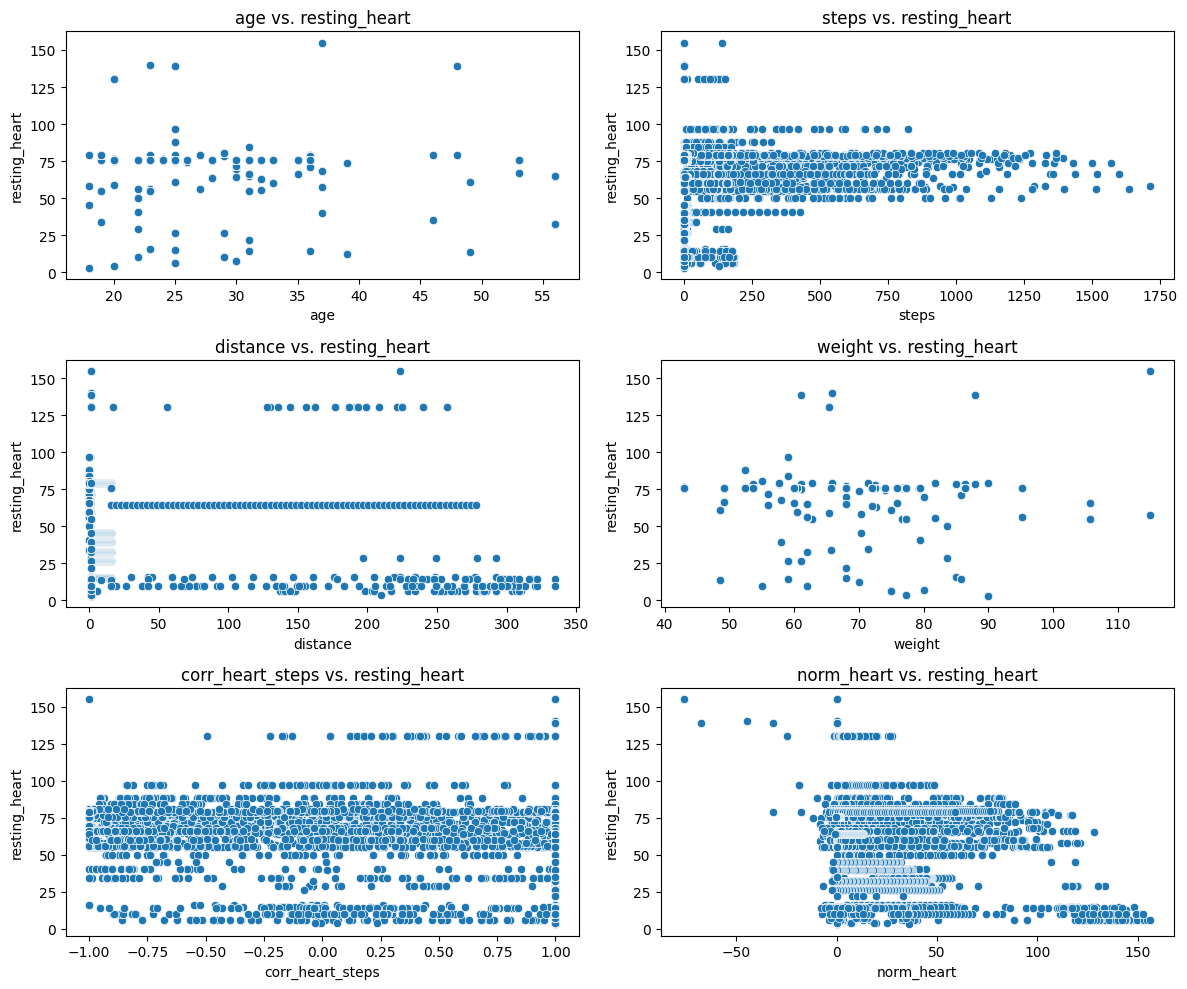

In [54]:
# Choose the columns you want to compare against hear_rate
x_cols = ['age','steps', 'distance', 'weight', 'corr_heart_steps', 'norm_heart']
y_col = 'resting_heart'

# Set up the 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.ravel()  # Flatten to make indexing easier

# Loop through and plot each scatterplot
for i, x_col in enumerate(x_cols):
    sns.scatterplot(x=x_col, y=y_col, data=df, ax=axes[i])
    axes[i].set_title(f"{x_col} vs. {y_col}")

plt.tight_layout()
plt.show()


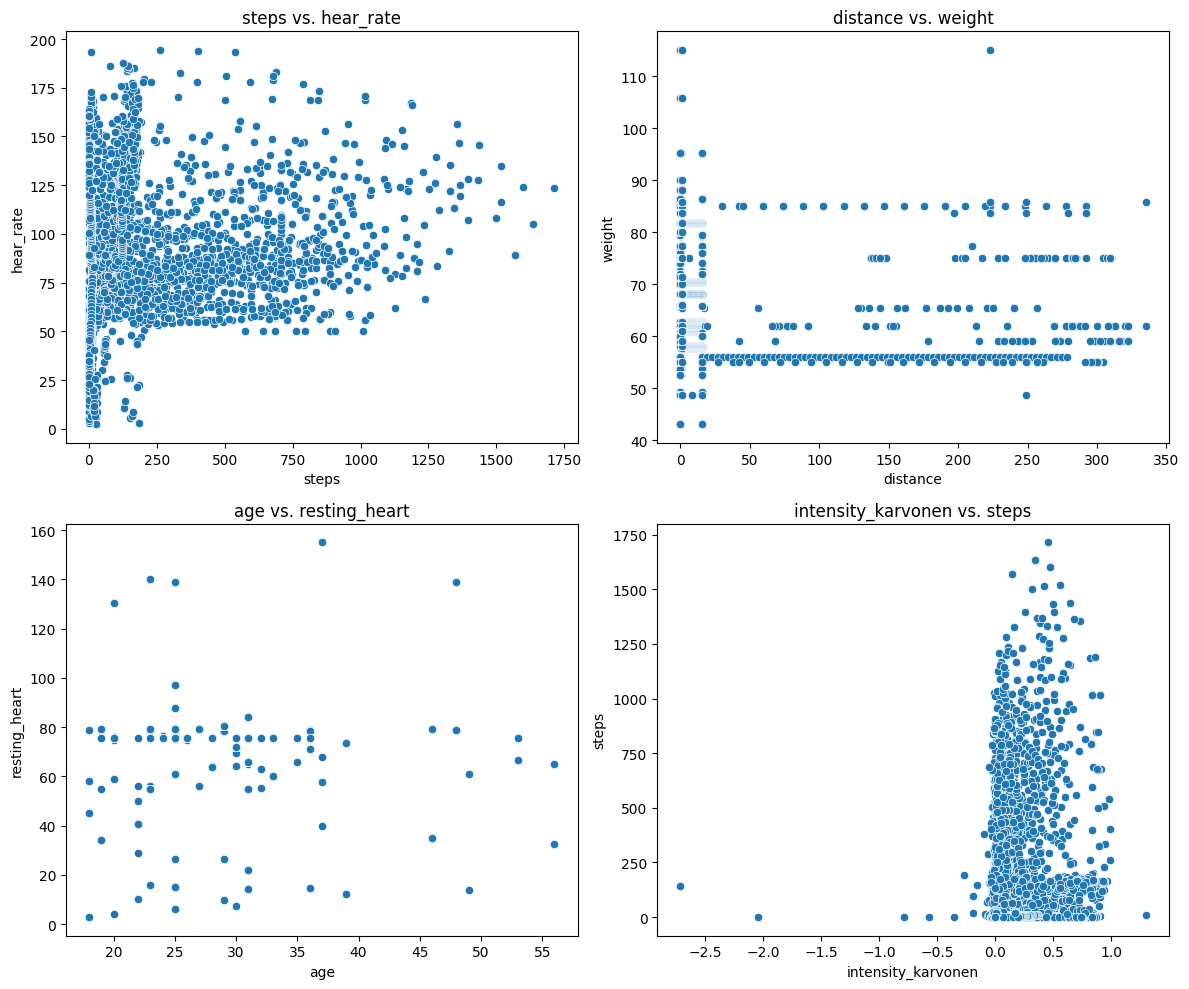

In [ ]:
#  custom X and Y pairs
xy_pairs = [('steps', 'hear_rate'), ('distance', 'weight'),
            ('age', 'resting_heart'), ('intensity_karvonen', 'steps')]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (x, y) in enumerate(xy_pairs):
    sns.scatterplot(x=x, y=y, data=df, ax=axes[i])
    axes[i].set_title(f"{x} vs. {y}")

plt.tight_layout()
plt.show()


### correlation heatmap

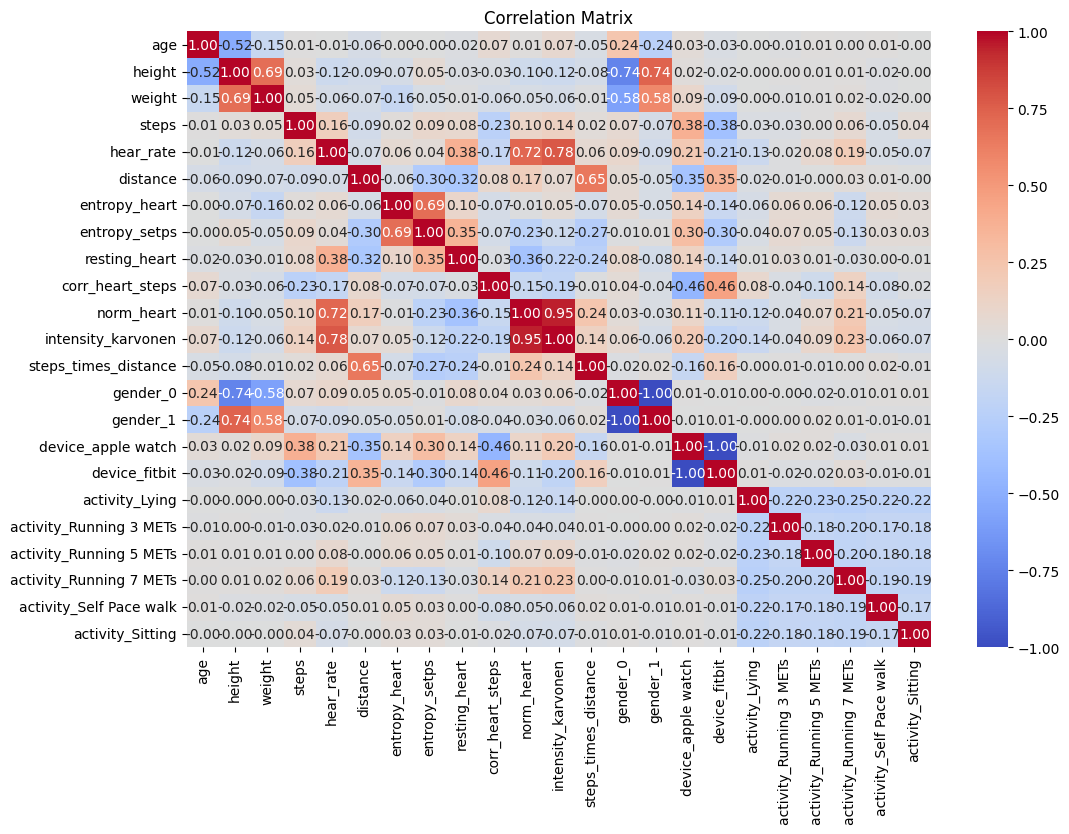

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### boxplot

In [64]:
# Select the one-hot encoded activity columns
activity_cols = [col for col in df1.columns if col.startswith('activity_')]

# Get the activity name from the column where the value is 1
df1['activity'] = df1[activity_cols].idxmax(axis=1)

# Optional: Clean up the activity names (remove the prefix)
df1['activity'] = df1['activity'].str.replace('activity_', '', regex=False)


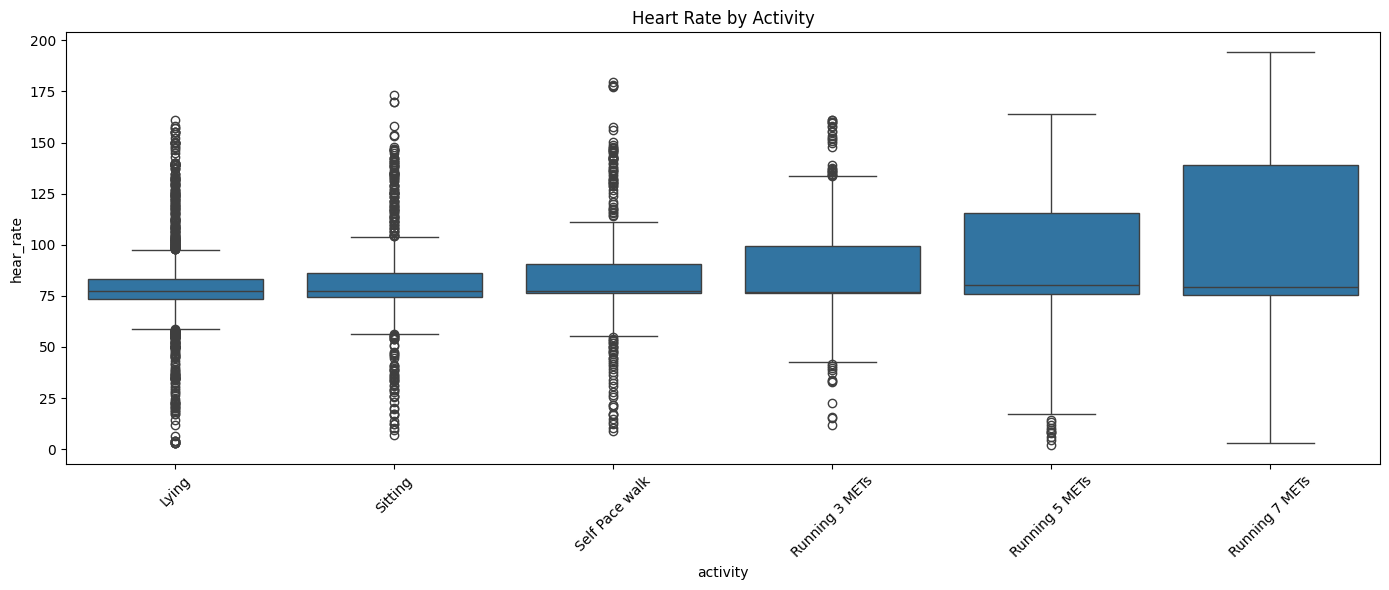

In [67]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='activity', y='hear_rate', data=df1)
plt.xticks(rotation=45)
plt.title("Heart Rate by Activity")
plt.tight_layout()
plt.show()


In [71]:
# X = features, excluding the activity columns
feature_cols = [
    'age', 'height', 'weight', 'steps', 'hear_rate', 'distance',
    'entropy_heart', 'entropy_setps', 'resting_heart', 'corr_heart_steps',
    'norm_heart', 'intensity_karvonen', 'steps_times_distance',
    'gender_0', 'gender_1', 'device_apple watch', 'device_fitbit'
]

X = df1[feature_cols]

# Create target label from one-hot activity columns
activity_cols = [col for col in df1.columns if col.startswith('activity_')]
y = df1[activity_cols].idxmax(axis=1).str.replace('activity_', '')


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# create features by dropping our target
#X = test_df3.drop(columns=['Diabetes_yes'])
X = test_df3.drop(columns=['Diabetes_yes'])
X

In [ ]:
X.columns

In [ ]:
# create our target
#y = test_df3['Diabetes_yes']
y = test_df3['Diabetes_yes']
y

In [ ]:
# check the balance of the target value
y.value_counts()

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, stratify=y)

In [ ]:
# create a scaler instance
X_scaler = skl.preprocessing.StandardScaler()

In [ ]:
# fit/train the scaler
X_scaler.fit(X_train)

In [ ]:
# scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

In [ ]:
# create a logistic regression model
#model = LogisticRegression(solver='lbfgs', random_state=1)
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=5, penalty='l1', solver='saga', 
            max_iter=10000, random_state=1)
model

In [ ]:
# fit (train) model using the training data
model.fit(X_resampled, y_resampled)

In [ ]:
# predict outcomes for the test data set
predictions = model.predict(X_test_scaled)
# predictions = model.predict(X_test)
pd.DataFrame( {'Prediction': predictions, 'Acutal': y_test} )

- model.predict(X_test_scaled) vs model.predict(X_test)

In [ ]:
# predict outcomes for the test data set
# predictions = model.predict(X_test_scaled)
predictions = model.predict(X_test)
pd.DataFrame( {'Prediction': predictions, 'Acutal': y_test} )

In [ ]:
# predict outcomes for the test data set
#predictions = model.predict(X_test_scaled)
predictions = model.predict(X_test)
pd.DataFrame( {'Prediction': predictions, 'Acutal': y_test} )

In [ ]:
# cal. the balanced accuracy score
#y_pred = model.predict(X_test_scaled)
y_pred = model.predict(X_test)
score = balanced_accuracy_score(y_test, y_pred)
print('Accuracy score: ', score)

In [ ]:
# show a text report of the main classification metrics 
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
# list the model coefficient into a df
df_logistic = pd.DataFrame( 
        data=model.coef_[0], 
        index=X.columns.to_numpy(), 
        columns=['coef'] )

df_logistic

In [ ]:
X.columns

In [ ]:
# save the model to curent directory
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
loaded_model